In [198]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

PI=np.pi
PI2=2*PI

def gencircle(rc,rr=0.1,offset=[0,0],num=100,label=0):
    #taken from https://qiita.com/xiangze750/items/1d024c8536d128c3ceae
    c=[]
    for i in range(num):
        r=rc+np.random.uniform(-rr,rr,1)
        th=np.random.uniform(0,PI2,1)
        c.append([r*np.sin(th)+offset[0],r*np.cos(th)+offset[1]])
    return np.c_[np.array(c).reshape(num,2),np.repeat(label,num)]

# Define the normalized function
def min_max_normalized(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

#X=np.r_[gencircle(0.1,0.1,num=1000,label=0),gencircle(0.5,0.1,num=1000,label=1)][:,0:2]

#plt.scatter(X[0:1000,0],X[0:1000,1],color="red")
#plt.scatter(X[1000:2000,0],X[1000:2000,1],color="blue")

In [199]:
X_full=np.r_[gencircle(0.1,0.1,num=1000,label=0),gencircle(0.5,0.1,num=1000,label=1)]

In [200]:
# Shuffling the data and creating training and test samples
sampled_data = X_full[np.random.choice(X_full.shape[0], 2000 , replace=False),:]
X_train = sampled_data[0:1000,0:2]
train_y = sampled_data[0:1000,2]
X_test = sampled_data[1000:2000,0:2]
test_y = sampled_data[1000:2000,2]

In [201]:
train_X = min_max_normalized(X_train)
test_X = min_max_normalized(X_test)

In [202]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, A's dimension is (2, 1)
A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [203]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 2])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [204]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

In [205]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [206]:
# Define the learning rate， batch_size etc.
learning_rate = 0.003
batch_size = 30
iter_num = 1500

In [207]:
# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [208]:
# Define the goal
goal = opt.minimize(loss)

In [209]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [210]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [211]:
# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.784267 train_acc: 0.502000 test_acc: 0.498000
epoch:  600 loss: 0.951090 train_acc: 0.502000 test_acc: 0.498000
epoch:  900 loss: 0.887292 train_acc: 0.502000 test_acc: 0.498000
epoch: 1200 loss: 0.796994 train_acc: 0.596000 test_acc: 0.571000
epoch: 1500 loss: 0.694385 train_acc: 0.658000 test_acc: 0.647000


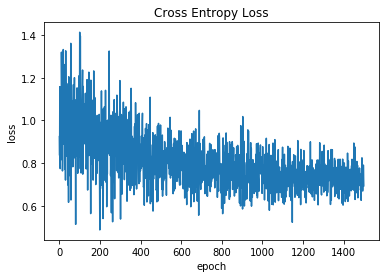

In [212]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

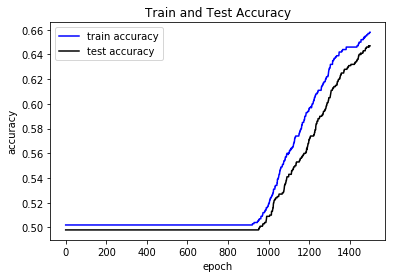

In [213]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()